In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 90)

df = pd.read_csv("C:/Users/marcio/Documents/fish_analyzer_final.csv", index_col=0)
import ast
df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)
df['center_of_mass'] = df['center_of_mass'].apply(ast.literal_eval)

#df['head'] = df['head'].apply(ast.literal_eval)



In [2]:
df["tail_uniformity"] = np.NaN

def vari(the_tuple):
    if isinstance(the_tuple, tuple):
        y_tuple = tuple(zip(*the_tuple))[1]
        cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100        
        result = cv(y_tuple)
        if result is not None:      
            return result
        else:
            return np.NaN
    else:
        np.NaN

df["tail_uniformity"] = df.tail_coords.apply(vari)

In [3]:
df.loc[1327]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,tail_coords,take
frame_number,,,,,,,,,,,,
1327,15.620499,"(707, 734)","(689, 706)","(717, 746)",1,325.5,1,"(440, 426, 408, 444)",2154,0.143487,"((1.0, 1.0029504689751452), (1.027871425912429...",1
1327,22.135944,"(139, 663)","(185, 654)","(118, 670)",0,614.5,1,"(0, 430, 414, 440)",9,0.152971,"((1.0, 1.0028328483253053), (1.471996523034363...",1
1327,13.038405,"(97, 42)","(69, 43)","(110, 41)",3,255.5,1,"(0, 0, 416, 409)",6819,4.210441,"((1.0, 1.0451416043269932), (1.324029043664585...",3


<AxesSubplot:>

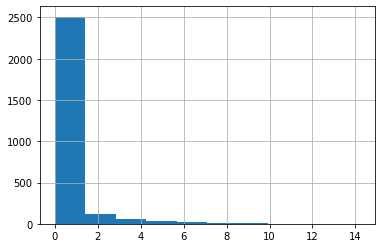

In [4]:
df.tail_uniformity.hist()

In [5]:
#df = df[(df["quadrant"] == 1) & (df["fish_id"] == 1)]

In [6]:
df["ant"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-3])
df["pen"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-2])
df["ult"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-1])


In [7]:
df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()

for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    print(the_idxs)    
    cycle_number = 1
    count=0  
    for i in the_idxs:       
        #df.loc[i, "cycle"] = cycle_number
        df.loc[(df.index == i) & (df["sequence"] == n), "cycle"] = cycle_number

        count=count+1        
        if count == 6:
            cycle_number=cycle_number+1
            count = 0 
                
        
            
    
    
    
    

3500
Int64Index([1276, 1277, 1278, 1279, 1280, 1281], dtype='int64', name='frame_number')
3503
Int64Index([1288, 1289, 1290, 1291, 1292, 1293, 1294], dtype='int64', name='frame_number')
5
Int64Index([1292, 1293, 1294, 1295, 1296, 1297, 1298], dtype='int64', name='frame_number')
6
Int64Index([1300, 1301, 1302, 1303, 1304, 1305], dtype='int64', name='frame_number')
8
Int64Index([1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319], dtype='int64', name='frame_number')
2151
Int64Index([1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319], dtype='int64', name='frame_number')
9
Int64Index([1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331,
            1332],
           dtype='int64', name='frame_number')
2154
Int64Index([1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335,
            1336, 1337, 1338, 1339, 1340, 1341],
           dtype='int64', name='frame_number')
6819
Int64Index([1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334], dtype='int64', name='fra

In [8]:
#df["cycle"].unique()


In [9]:
df['diffs'] = df.groupby(["sequence", "cycle"])['ult'].diff()
df['speed_frame']=df['diffs'].apply(lambda x: abs(x))


In [10]:
df.head(10)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,tail_coords,take,ant,pen,ult,cycle,diffs,speed_frame
frame_number,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",3500,0.174481,"((1.0, 1.000057331671283), (1.0271758204179882...",1,1.000333,1.001754,1.003994,1.0,NaN,NaN
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",3500,0.146332,"((1.0, 1.0017590444256896), (1.026618108614703...",1,0.999026,0.998708,1.001782,1.0,-0.002212,0.002212
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",3500,0.351359,"((1.0, 0.9998988815682495), (1.026690610348372...",1,0.999408,1.000377,1.007837,1.0,0.006055,0.006055
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",3500,0.304076,"((1.0, 0.9980453015716009), (1.027379901809518...",1,1.000358,1.001782,1.006099,1.0,-0.001739,0.001739
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",3500,0.101164,"((1.0, 0.9999164764406316), (1.027667576805617...",1,0.999485,0.998389,0.997957,1.0,-0.008141,0.008141
1281,17.720045,"(691, 481)","(656, 468)","(708, 486)",1,360.0,2,"(440, 426, 408, 444)",3500,0.104689,"((1.0, 1.0020090685513239), (1.026766943759042...",1,1.000308,1.001751,1.002005,1.0,0.004048,0.004048
1288,17.492856,"(710, 490)","(677, 471)","(725, 499)",1,354.5,2,"(440, 426, 408, 444)",3503,0.091183,"((1.0, 1.0018316730914059), (1.026610112569619...",1,1.000424,1.001470,1.000076,1.0,NaN,NaN
1289,18.867962,"(712, 491)","(677, 471)","(728, 501)",1,361.5,2,"(440, 426, 408, 444)",3503,0.193937,"((1.0, 1.0016460227135742), (1.027221846633445...",1,0.999553,0.998584,0.996479,1.0,-0.003597,0.003597
1290,15.811388,"(718, 495)","(685, 477)","(731, 504)",1,355.5,2,"(440, 426, 408, 444)",3503,0.576782,"((1.0, 1.001623907381969), (1.0287905250762592...",1,1.000266,0.996614,0.987400,1.0,-0.009079,0.009079


In [11]:
df.loc[1327]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,tail_coords,take,ant,pen,ult,cycle,diffs,speed_frame
frame_number,,,,,,,,,,,,,,,,,,
1327,15.620499,"(707, 734)","(689, 706)","(717, 746)",1,325.5,1,"(440, 426, 408, 444)",2154,0.143487,"((1.0, 1.0029504689751452), (1.027871425912429...",1,0.999535,1.000329,1.002175,1.0,NaN,NaN
1327,22.135944,"(139, 663)","(185, 654)","(118, 670)",0,614.5,1,"(0, 430, 414, 440)",9,0.152971,"((1.0, 1.0028328483253053), (1.471996523034363...",1,0.999246,0.999030,0.999870,2.0,-0.003352,0.003352
1327,13.038405,"(97, 42)","(69, 43)","(110, 41)",3,255.5,1,"(0, 0, 416, 409)",6819,4.210441,"((1.0, 1.0451416043269932), (1.324029043664585...",3,0.994098,0.980920,0.929752,1.0,NaN,NaN


In [12]:
#df["velocity"] = np.NaN

temp = df.groupby(["sequence", "cycle"])["speed_frame"].apply(lambda grp: grp.mean())
temp = temp.reset_index()

#df["velocity"] = temp["cycle"]


In [13]:
df.loc[1327]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,tail_coords,take,ant,pen,ult,cycle,diffs,speed_frame
frame_number,,,,,,,,,,,,,,,,,,
1327,15.620499,"(707, 734)","(689, 706)","(717, 746)",1,325.5,1,"(440, 426, 408, 444)",2154,0.143487,"((1.0, 1.0029504689751452), (1.027871425912429...",1,0.999535,1.000329,1.002175,1.0,NaN,NaN
1327,22.135944,"(139, 663)","(185, 654)","(118, 670)",0,614.5,1,"(0, 430, 414, 440)",9,0.152971,"((1.0, 1.0028328483253053), (1.471996523034363...",1,0.999246,0.999030,0.999870,2.0,-0.003352,0.003352
1327,13.038405,"(97, 42)","(69, 43)","(110, 41)",3,255.5,1,"(0, 0, 416, 409)",6819,4.210441,"((1.0, 1.0451416043269932), (1.324029043664585...",3,0.994098,0.980920,0.929752,1.0,NaN,NaN


In [14]:
temp.head(10)

,sequence,cycle,speed_frame
0,5,1.0,0.005827
1,5,2.0,NaN
2,6,1.0,0.001470
3,8,1.0,0.000538
4,8,2.0,0.001798
5,9,1.0,0.007395
6,9,2.0,0.001890
7,10,1.0,0.002482
8,10,2.0,0.005315
9,10,3.0,0.003006


In [15]:
df = df.reset_index()
temp = temp.rename(columns={"speed_frame":"speed_cycle"})
        
df = df.merge(temp, on=["sequence", "cycle"]) #.set_axis(df.index)
df.head(5)

,frame_number,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,tail_coords,take,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
0,1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",3500,0.174481,"((1.0, 1.000057331671283), (1.0271758204179882...",1,1.000333,1.001754,1.003994,1.0,NaN,NaN,0.004439
1,1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",3500,0.146332,"((1.0, 1.0017590444256896), (1.026618108614703...",1,0.999026,0.998708,1.001782,1.0,-0.002212,0.002212,0.004439
2,1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",3500,0.351359,"((1.0, 0.9998988815682495), (1.026690610348372...",1,0.999408,1.000377,1.007837,1.0,0.006055,0.006055,0.004439
3,1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",3500,0.304076,"((1.0, 0.9980453015716009), (1.027379901809518...",1,1.000358,1.001782,1.006099,1.0,-0.001739,0.001739,0.004439
4,1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",3500,0.101164,"((1.0, 0.9999164764406316), (1.027667576805617...",1,0.999485,0.998389,0.997957,1.0,-0.008141,0.008141,0.004439


In [16]:

df = df.set_index('frame_number')


In [17]:
df.loc[1327]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,tail_coords,take,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
frame_number,,,,,,,,,,,,,,,,,,,
1327,15.620499,"(707, 734)","(689, 706)","(717, 746)",1,325.5,1,"(440, 426, 408, 444)",2154,0.143487,"((1.0, 1.0029504689751452), (1.027871425912429...",1,0.999535,1.000329,1.002175,1.0,NaN,NaN,0.006586
1327,22.135944,"(139, 663)","(185, 654)","(118, 670)",0,614.5,1,"(0, 430, 414, 440)",9,0.152971,"((1.0, 1.0028328483253053), (1.471996523034363...",1,0.999246,0.999030,0.999870,2.0,-0.003352,0.003352,0.001890
1327,13.038405,"(97, 42)","(69, 43)","(110, 41)",3,255.5,1,"(0, 0, 416, 409)",6819,4.210441,"((1.0, 1.0451416043269932), (1.324029043664585...",3,0.994098,0.980920,0.929752,1.0,NaN,NaN,0.066694


In [18]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,tail_coords,take,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
frame_number,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",3500,0.174481,"((1.0, 1.000057331671283), (1.0271758204179882...",1,1.000333,1.001754,1.003994,1.0,NaN,NaN,0.004439
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",3500,0.146332,"((1.0, 1.0017590444256896), (1.026618108614703...",1,0.999026,0.998708,1.001782,1.0,-0.002212,0.002212,0.004439
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",3500,0.351359,"((1.0, 0.9998988815682495), (1.026690610348372...",1,0.999408,1.000377,1.007837,1.0,0.006055,0.006055,0.004439
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",3500,0.304076,"((1.0, 0.9980453015716009), (1.027379901809518...",1,1.000358,1.001782,1.006099,1.0,-0.001739,0.001739,0.004439
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",3500,0.101164,"((1.0, 0.9999164764406316), (1.027667576805617...",1,0.999485,0.998389,0.997957,1.0,-0.008141,0.008141,0.004439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,16.278821,"(821, 792)","(796, 765)","(833, 803)",1,327.5,2,"(440, 426, 408, 444)",4995,0.192551,"((1.0, 1.0000344044073048), (1.027895975055736...",1,1.000211,1.001638,1.004449,1.0,0.006305,0.006305,0.003505
3449,16.278821,"(822, 793)","(796, 767)","(833, 805)",1,325.0,2,"(440, 426, 408, 444)",4995,0.152555,"((1.0, 0.9999424444730209), (1.028456684154356...",1,0.999643,1.000256,1.003386,1.0,-0.001063,0.001063,0.003505
3450,14.866069,"(824, 796)","(800, 773)","(834, 807)",1,317.0,2,"(440, 426, 408, 444)",4995,0.039374,"((1.0, 1.0008760061827164), (1.026994181387241...",1,0.999925,1.000052,0.999988,1.0,-0.003398,0.003398,0.003505


In [19]:
#df["distance_cycle"] = np.NaN
import math
temp = df.groupby(["sequence", "cycle"])
#temp = temp.reset_index()
the_firsts = temp.head(1)
print(the_firsts.columns)
the_lasts = temp.tail(1)
the_firsts["distance_cycle"] = np.NaN


for i in range(0, len(the_firsts)):
    #the_idxs = df.loc[df["sequence"] == i].index
    first_com = the_firsts.iloc[i, 1]
    last_com = the_lasts.iloc[i, 1]
    the_firsts.iloc[i, 19] = math.hypot((first_com[0] - last_com[0]), (first_com[1] - last_com[1]))
      
    
    
temp = the_firsts[["sequence", "cycle", "distance_cycle"]]
#temp = temp.rename(columns={"distance":"distance_g"})
df = df.reset_index()

df = df.merge(temp, on=["sequence", "cycle"])

    
df = df.set_index('frame_number')        
    
    



Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_uniformity', 'tail_coords', 'take', 'ant', 'pen', 'ult', 'cycle',
       'diffs', 'speed_frame', 'speed_cycle'],
      dtype='object')


<ipython-input-19-a21b79bd7faa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_firsts["distance_cycle"] = np.NaN
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [20]:
df.loc[1327]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,tail_coords,take,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle
frame_number,,,,,,,,,,,,,,,,,,,,
1327,15.620499,"(707, 734)","(689, 706)","(717, 746)",1,325.5,1,"(440, 426, 408, 444)",2154,0.143487,"((1.0, 1.0029504689751452), (1.027871425912429...",1,0.999535,1.000329,1.002175,1.0,NaN,NaN,0.006586,4.472136
1327,22.135944,"(139, 663)","(185, 654)","(118, 670)",0,614.5,1,"(0, 430, 414, 440)",9,0.152971,"((1.0, 1.0028328483253053), (1.471996523034363...",1,0.999246,0.999030,0.999870,2.0,-0.003352,0.003352,0.001890,1.000000
1327,13.038405,"(97, 42)","(69, 43)","(110, 41)",3,255.5,1,"(0, 0, 416, 409)",6819,4.210441,"((1.0, 1.0451416043269932), (1.324029043664585...",3,0.994098,0.980920,0.929752,1.0,NaN,NaN,0.066694,5.099020


<AxesSubplot:>

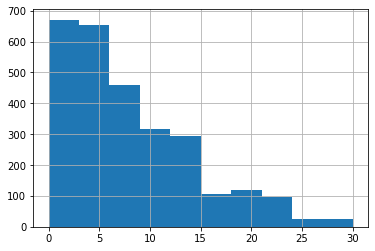

In [21]:
filt = df[["cycle", "fish_id", "quadrant", "sequence", "distance_cycle", "take"]]
filt["distance_cycle"].hist()
#filt[filt["distance_cycle"] > 20]


In [22]:
temp_max = df.groupby(["sequence", "cycle"])["ult"].max()
temp_max = temp_max.reset_index()
temp_max = temp_max.rename(columns={"ult":"ult_max"})
df = df.reset_index()
df = df.merge(temp_max, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')        


temp_min = df.groupby(["sequence", "cycle"])["ult"].min()
temp_min = temp_min.reset_index()
temp_min = temp_min.rename(columns={"ult":"ult_min"})
df = df.reset_index()
df = df.merge(temp_min, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')
df["ult_min"] = df["ult_min"].apply(lambda x: abs(x))



In [23]:
df.loc[1327]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,...,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min
frame_number,,,,,,,,,,,,,,,,,,,,,
1327,15.620499,"(707, 734)","(689, 706)","(717, 746)",1,325.5,1,"(440, 426, 408, 444)",2154,0.143487,...,0.999535,1.000329,1.002175,1.0,NaN,NaN,0.006586,4.472136,1.008047,1.001141
1327,22.135944,"(139, 663)","(185, 654)","(118, 670)",0,614.5,1,"(0, 430, 414, 440)",9,0.152971,...,0.999246,0.999030,0.999870,2.0,-0.003352,0.003352,0.001890,1.000000,1.004570,0.999870
1327,13.038405,"(97, 42)","(69, 43)","(110, 41)",3,255.5,1,"(0, 0, 416, 409)",6819,4.210441,...,0.994098,0.980920,0.929752,1.0,NaN,NaN,0.066694,5.099020,1.023469,0.877556


In [24]:
df["amplitude_cycle"] = abs(df["ult_max"] - df["ult_min"])



In [25]:
df.head(6)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_uniformity,...,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min,amplitude_cycle
frame_number,,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",3500,0.174481,...,1.001754,1.003994,1.0,NaN,NaN,0.004439,11.401754,1.007837,0.997957,0.00988
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",3500,0.146332,...,0.998708,1.001782,1.0,-0.002212,0.002212,0.004439,11.401754,1.007837,0.997957,0.00988
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",3500,0.351359,...,1.000377,1.007837,1.0,0.006055,0.006055,0.004439,11.401754,1.007837,0.997957,0.00988
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",3500,0.304076,...,1.001782,1.006099,1.0,-0.001739,0.001739,0.004439,11.401754,1.007837,0.997957,0.00988
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",3500,0.101164,...,0.998389,0.997957,1.0,-0.008141,0.008141,0.004439,11.401754,1.007837,0.997957,0.00988
1281,17.720045,"(691, 481)","(656, 468)","(708, 486)",1,360.0,2,"(440, 426, 408, 444)",3500,0.104689,...,1.001751,1.002005,1.0,0.004048,0.004048,0.004439,11.401754,1.007837,0.997957,0.00988


In [26]:
#df=df.loc[df["speed_cycle"] < 110]
#df=df.loc[df["distance_cycle"] < 38]
#df=df.loc[df["amplitude_cycle"] < 160]

In [27]:
df["freq"] = df["speed_cycle"]/(df["amplitude_cycle"]*2)


#df=df.loc[(df["freq"] < 0.24 )]



df["wave_length"] = df["speed_cycle"]/df["freq"]

In [28]:
df["freq*ampli"] = df["amplitude_cycle"]*df["freq"]

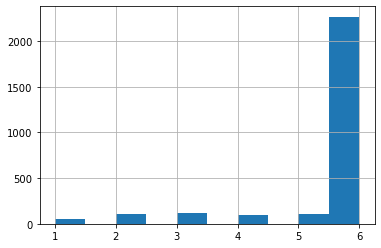

In [29]:
temp = df.groupby(["sequence", "cycle"])["pen"].count()
temp = temp.reset_index()
temp = temp.rename(columns={"pen":"c_counts"})
df = df.reset_index()
df = df.merge(temp, on=["sequence", "cycle"])
df = df.set_index('frame_number')        


df["c_counts"].hist(bins=10)

df = df.loc[df["c_counts"] > 5]

In [30]:
temp = df.groupby(["sequence", "cycle"])["tail_uniformity"].max()
temp = temp.reset_index()
#temp = temp.rename(columns={"pen":"c_counts"})
df = df.reset_index()
df = df.merge(temp, on=["sequence", "cycle"])
df = df.set_index('frame_number') 
df = df.rename(columns={"tail_uniformity_y":"tail_uniformity"})
df = df.drop('tail_uniformity_x', axis=1)

       

In [31]:
pd.set_option('display.max_columns', None)
df[df["c_counts"] > 10].head(15)


,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,tail_uniformity
frame_number,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [32]:

df.loc[1325]


,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,tail_uniformity
frame_number,,,,,,,,,,,,,,,,,,,,,,,,,,,
1325,22.135944,"(139, 663)","(186, 653)","(118, 670)",0,606.5,1,"(0, 430, 414, 440)",9,"((1.0, 1.0028328483253046), (1.468345083085657...",1,0.999246,0.999030,0.999870,1.0,NaN,NaN,0.007395,1.414214,1.025043,0.999849,0.025194,0.146759,0.050387,0.003697,6,1.440120
1325,13.601471,"(707, 734)","(691, 705)","(715, 745)",1,311.5,1,"(440, 426, 408, 444)",2154,"((1.0, 1.0023471857253217), (1.028923598852018...",1,0.999711,1.000201,1.001141,1.0,-0.025173,0.025173,0.006586,4.472136,1.008047,1.001141,0.006906,0.476852,0.013812,0.003293,6,0.352167


<AxesSubplot:>

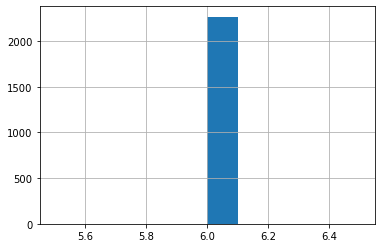

In [33]:
df["c_counts"].hist(bins=10)


In [34]:
df["fish_speed"] = df["distance_cycle"]/df["c_counts"]


In [35]:
df["fish_uid"] = df.apply(lambda x: str(x.quadrant) + str(x.fish_id), axis = 1 )

In [36]:
df["freq_veloc_esp"] = df["amplitude_cycle"]/df["fish_speed"]
df["amp_veloc_esp"] = df["freq"]/df["fish_speed"]

In [37]:
graphs = df.groupby(["sequence", "cycle"])
to_graphs = graphs.tail(1)
len(to_graphs)

378

In [38]:
to_graphs = to_graphs.loc[to_graphs["tail_uniformity"] < 1]

In [39]:
only1 = to_graphs.loc[(to_graphs["quadrant"] == 3) & (to_graphs["fish_id"] == 2)]
#only1

In [40]:
only1 = only1.drop(3233)


Decimal Representation p: 0.081034918260270899503794339580
Decimal Representation r: 0.481848476395210667533319792710


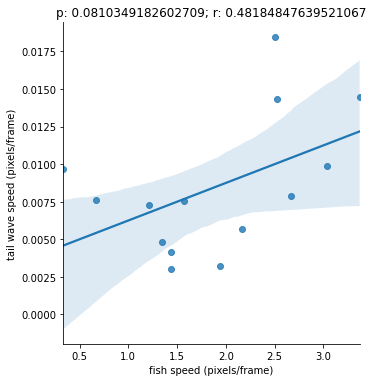

In [41]:
#to_graphs=to_graphs.loc[to_graphs["speed_cycle"] < 140]

#from scipy.stats import spearmanr
from scipy.stats.mstats import spearmanr


ax = sns.lmplot(data=only1, x="fish_speed", y="speed_cycle") #.set(title='p: 0.00000050; r: 0.35')
r, pvalue = spearmanr(only1["fish_speed"], only1["speed_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave speed (pixels/frame)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(f"Decimal Representation p: {pvalue:.30f}")
print(f"Decimal Representation r: {r:.30f}")

<AxesSubplot:>

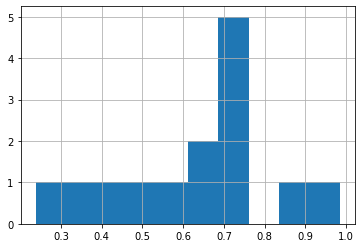

In [42]:

only1["tail_uniformity"].hist()



0.0007823192100385193
Decimal Representation of p: 0.000782319210038519307660875857
Decimal Representation of r: -0.194848576180117388778612053102


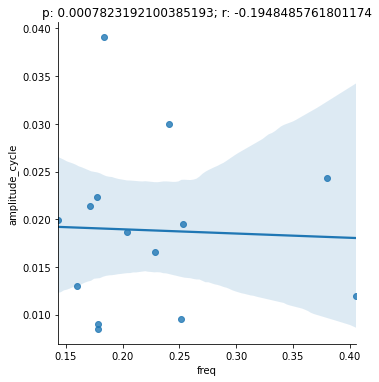

In [51]:
from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=only1, x="freq", y="amplitude_cycle")
r, pvalue = spearmanr(to_graphs["freq"], to_graphs["amplitude_cycle"])
ax.set(xlabel='freq', ylabel='amplitude_cycle').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

0.023117040480791794
Decimal Representation of p: 0.023117040480791793688464252909
Decimal Representation of r: 0.600660429478961255256308504613


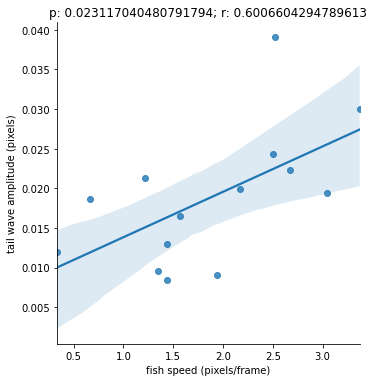

In [44]:
from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=only1, x="fish_speed", y="amplitude_cycle")
r, pvalue = spearmanr(only1["fish_speed"], only1["amplitude_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave amplitude (pixels)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [45]:
to_graphs.columns

Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_coords', 'take', 'ant', 'pen', 'ult', 'cycle', 'diffs',
       'speed_frame', 'speed_cycle', 'distance_cycle', 'ult_max', 'ult_min',
       'amplitude_cycle', 'freq', 'wave_length', 'freq*ampli', 'c_counts',
       'tail_uniformity', 'fish_speed', 'fish_uid', 'freq_veloc_esp',
       'amp_veloc_esp'],
      dtype='object')

0.0810349182602709
Decimal Representation of p: 0.081034918260270899503794339580
Decimal Representation of r: 0.481848476395210667533319792710


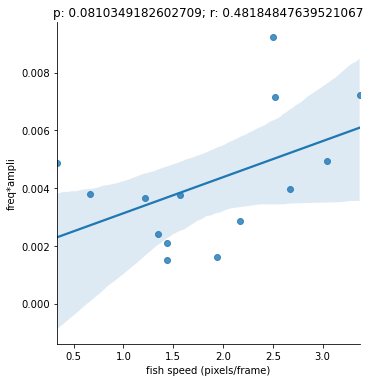

In [46]:
#df=df.loc[df["amp/freq"] < 1]


from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq*ampli"])

ax = sns.lmplot(data=only1, x="fish_speed", y="freq*ampli").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='freq*ampli')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

0.9404873477713442
Decimal Representation of p: 0.940487347771344239788504637545
Decimal Representation of r: 0.022002213534027884045407574831


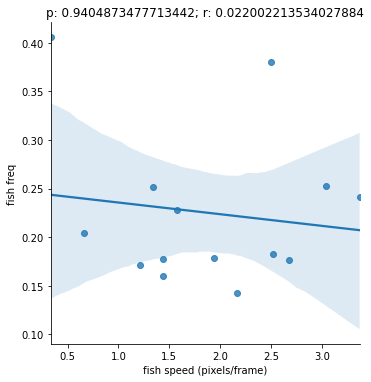

In [47]:

from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq"])
ax = sns.lmplot(data=only1, x="fish_speed", y="freq").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='fish freq')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

0.0810349182602709
Decimal Representation of p: 0.081034918260270899503794339580
Decimal Representation of r: 0.481848476395210667533319792710


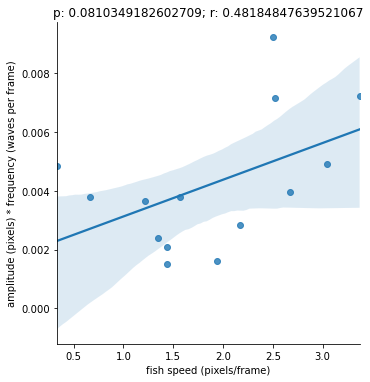

In [48]:
from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq*ampli"])

ax = sns.lmplot(data=only1, x="fish_speed", y="freq*ampli").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='amplitude (pixels) * frequency (waves per frame)')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

[Text(0.5, 0, ''), Text(0, 0.5, '')]

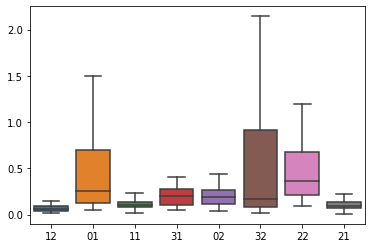

In [49]:

ax = sns.boxplot(data=df, x="fish_uid", y="amp_veloc_esp", showfliers = False)
ax.set(xlabel='', ylabel='')


[Text(0.5, 0, ''), Text(0, 0.5, '')]

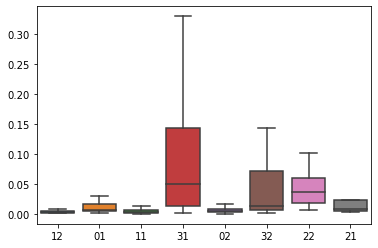

In [50]:
ax = sns.boxplot(data=df, x="fish_uid", y="freq_veloc_esp",showfliers = False)
ax.set(xlabel='', ylabel='')
